# Preprocessing and Visualisation 

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn import preprocessing

# Predictive Modelling
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split # train-test data split
from sklearn.linear_model import LinearRegression # linear regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

#Accuracy Estimators
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Reading the Data

In [107]:
airbnb = pd.read_csv("Data/listing(detailed).csv")

There are total of 8386 rows and 75 columns

In [108]:
airbnb.shape

(8386, 75)

In [109]:
airbnb.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,761411,https://www.airbnb.com/rooms/761411,20230903194145,2023-09-03,city scrape,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,"Really quiet, spacious and safe, a nice place ...","The neighborhood is very green, quiet, safe an...",https://a0.muscache.com/pictures/10591508/bf30...,4013546,...,4.92,4.42,4.65,0363 D4AD DCF3 E72A 56A2,t,2,0,2,0,2.30
1,768274,https://www.airbnb.com/rooms/768274,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,Our cool and spacious loft is perfect for a st...,Our neighbourhood is ons of the most beautiful...,https://a0.muscache.com/pictures/27206847/31f5...,3678216,...,4.94,4.86,4.77,0363 7A50 18E7 51D1 B7F9,t,1,1,0,0,0.64
2,768737,https://www.airbnb.com/rooms/768737,20230903194145,2023-09-03,city scrape,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,Room to rent in my houseboat. The room has a p...,It is just outside the Jordan in between the c...,https://a0.muscache.com/pictures/1df40445-354f...,3877342,...,4.87,4.72,4.68,036396BE30827DDB9575,t,3,1,2,0,2.73
3,771217,https://www.airbnb.com/rooms/771217,20230903194145,2023-09-04,previous scrape,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,"Spacious houseboat in Amsterdam, suitable for ...",The houseboat lies in an area with ± 200 house...,https://a0.muscache.com/pictures/57715927/0808...,4068486,...,5.00,4.67,4.56,0363 D807 AD6C 499A F871,f,1,1,0,0,0.11
4,771343,https://www.airbnb.com/rooms/771343,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,Royal Bed & Coffee Room with a very comfortabl...,The building is located in Amsterdam centre in...,https://a0.muscache.com/pictures/ea22d262-7456...,2313061,...,4.91,4.96,4.79,0363 8C61 E9B9 5582 913E,f,2,0,2,0,6.62


--> Finding Null Values and here we can see that there are some of them in the revierws_per_month and other columns. 

In [110]:
airbnb.isnull().sum()

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
source                                            0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               830
Length: 75, dtype: int64

#Filling the missing values 

In [111]:
airbnb['neighborhood_overview'].isnull().sum()

3178

In [112]:
airbnb['reviews_per_month'].isnull().sum()

830

In [113]:
airbnb[['reviews_per_month']]

,reviews_per_month
0,2.30
1,0.64
2,2.73
3,0.11
4,6.62
...,...
8381,NaN
8382,NaN
8383,NaN
8384,NaN


In [114]:
airbnb[['neighborhood_overview']]

,neighborhood_overview
0,"The neighborhood is very green, quiet, safe an..."
1,Our neighbourhood is ons of the most beautiful...
2,It is just outside the Jordan in between the c...
3,The houseboat lies in an area with ± 200 house...
4,The building is located in Amsterdam centre in...
...,...
8381,NaN
8382,NaN
8383,Je hebt het gezellige Westerpark als achtertui...
8384,NaN


In [115]:
airbnb['neighborhood_overview'].fillna("No neighborhood review", inplace = True)

In [116]:
airbnb.isnull().sum()
airbnb['neighborhood_overview'].get(airbnb['neighborhood_overview']=="No neighborhood review")

6       No neighborhood review
7       No neighborhood review
17      No neighborhood review
22      No neighborhood review
25      No neighborhood review
                 ...          
8378    No neighborhood review
8381    No neighborhood review
8382    No neighborhood review
8384    No neighborhood review
8385    No neighborhood review
Name: neighborhood_overview, Length: 3178, dtype: object

There are total of 8386 columns and total of 8386 ids which means all the ids are unique value (Important Information)

In [117]:
airbnb['id'].nunique()

8386

In [118]:
airbnb.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [119]:
airbnb = airbnb.drop(["listing_url","scrape_id","last_scraped","source","picture_url","host_url", 
    "host_picture_url",'host_has_profile_pic','calendar_last_scraped', 'neighbourhood_group_cleansed'],axis=1)

In [120]:
airbnb.head()

,id,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,761411,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,"Really quiet, spacious and safe, a nice place ...","The neighborhood is very green, quiet, safe an...",4013546,Xsjong,2012-10-30,"Amsterdam, Netherlands","I'm a single man, live in Amsterdam north, hav...",within an hour,...,4.92,4.42,4.65,0363 D4AD DCF3 E72A 56A2,t,2,0,2,0,2.30
1,768274,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,Our cool and spacious loft is perfect for a st...,Our neighbourhood is ons of the most beautiful...,3678216,J & R,2012-09-26,"Amsterdam, Netherlands",We are from Amsterdam both working in the crea...,within an hour,...,4.94,4.86,4.77,0363 7A50 18E7 51D1 B7F9,t,1,1,0,0,0.64
2,768737,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,Room to rent in my houseboat. The room has a p...,It is just outside the Jordan in between the c...,3877342,Nicole,2012-10-15,"Amsterdam, Netherlands","Love to travel, especially South America and A...",within an hour,...,4.87,4.72,4.68,036396BE30827DDB9575,t,3,1,2,0,2.73
3,771217,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,"Spacious houseboat in Amsterdam, suitable for ...",The houseboat lies in an area with ± 200 house...,4068486,Danielle,2012-11-05,"Amsterdam, Netherlands","Danielle, Amsterdam",NaN,...,5.00,4.67,4.56,0363 D807 AD6C 499A F871,f,1,1,0,0,0.11
4,771343,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,Royal Bed & Coffee Room with a very comfortabl...,The building is located in Amsterdam centre in...,2313061,Marcel,2012-05-07,"Amsterdam, Netherlands","Hi, my name is Marcel and I live in the centre...",within an hour,...,4.91,4.96,4.79,0363 8C61 E9B9 5582 913E,f,2,0,2,0,6.62


In [121]:
airbnb.isnull().sum()

id                                                0
name                                              0
description                                       1
neighborhood_overview                             0
host_id                                           0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               830
Length: 65, dtype: int64

In [122]:
airbnb.loc[(airbnb["beds"].isnull() == True) & (airbnb["bedrooms"].isnull() == False),
           ["beds","bedrooms"]] = airbnb["bedrooms"]
airbnb.loc[(airbnb["beds"].isnull()== True) & (airbnb["bedrooms"].isnull()== True),
           ['beds','bedrooms']] = 1
airbnb.loc[(airbnb["bedrooms"].isnull()== True), 
           ['bedrooms']] = 1
airbnb.loc[(airbnb["bathrooms"].isnull()== True), 
           ['bathrooms']] = 1
airbnb['reviews_per_month'].fillna(airbnb['reviews_per_month'].mean(), inplace=True)

In [123]:
airbnb

,id,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,761411,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,"Really quiet, spacious and safe, a nice place ...","The neighborhood is very green, quiet, safe an...",4013546,Xsjong,2012-10-30,"Amsterdam, Netherlands","I'm a single man, live in Amsterdam north, hav...",within an hour,...,4.92,4.42,4.65,0363 D4AD DCF3 E72A 56A2,t,2,0,2,0,2.300000
1,768274,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,Our cool and spacious loft is perfect for a st...,Our neighbourhood is ons of the most beautiful...,3678216,J & R,2012-09-26,"Amsterdam, Netherlands",We are from Amsterdam both working in the crea...,within an hour,...,4.94,4.86,4.77,0363 7A50 18E7 51D1 B7F9,t,1,1,0,0,0.640000
2,768737,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,Room to rent in my houseboat. The room has a p...,It is just outside the Jordan in between the c...,3877342,Nicole,2012-10-15,"Amsterdam, Netherlands","Love to travel, especially South America and A...",within an hour,...,4.87,4.72,4.68,036396BE30827DDB9575,t,3,1,2,0,2.730000
3,771217,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,"Spacious houseboat in Amsterdam, suitable for ...",The houseboat lies in an area with ± 200 house...,4068486,Danielle,2012-11-05,"Amsterdam, Netherlands","Danielle, Amsterdam",NaN,...,5.00,4.67,4.56,0363 D807 AD6C 499A F871,f,1,1,0,0,0.110000
4,771343,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,Royal Bed & Coffee Room with a very comfortabl...,The building is located in Amsterdam centre in...,2313061,Marcel,2012-05-07,"Amsterdam, Netherlands","Hi, my name is Marcel and I live in the centre...",within an hour,...,4.91,4.96,4.79,0363 8C61 E9B9 5582 913E,f,2,0,2,0,6.620000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,971403658453358540,Rental unit in Amsterdam · ★New · 1 bedroom · ...,Modern Loft in Vibrant Amsterdam-North<br />Fl...,No neighborhood review,6879236,Michiel,2013-06-12,"Amsterdam, Netherlands","Male sailor, gardener cook",NaN,...,NaN,NaN,NaN,0363 9080 FE38 A7CE E7B7,f,1,1,0,0,1.175696
8382,971600466535392582,Home in Amsterdam · ★New · 3 bedrooms · 3 beds...,Plezier met het hele gezin in deze stijlvolle ...,No neighborhood review,307559908,Chris,2019-11-06,"Nederland, CO",NaN,NaN,...,NaN,NaN,NaN,0363 5639 0AD2 7A88 3FED,f,1,1,0,0,1.175696
8383,971686543447319533,Rental unit in Amsterdam · ★New · 1 bedroom · ...,"Tijdens onze reizen, verhuren we ons gezellige...",Je hebt het gezellige Westerpark als achtertui...,170194324,Yara,2018-01-27,"Amsterdam, Netherlands",NaN,within an hour,...,NaN,NaN,NaN,0363 C287 34D9 EA25 9428,t,1,1,0,0,1.175696
8384,971758168481363169,Hotel in Amsterdam · ★New · 1 bedroom · 1 bed ...,"While we may not be the fanciest hotel, our pr...",No neighborhood review,55794534,David,2016-01-23,"Ezor Tel Aviv, Israel",NaN,within an hour,...,NaN,NaN,NaN,Exempt,f,1,0,1,0,1.175696


In [124]:
len(airbnb.id.unique())

8386

In [125]:
len(airbnb.host_id.unique())

7269

In [126]:
airbnb[['host_since','host_location']].sort_values(by='host_since').head(1)

,host_since,host_location
8,2008-09-24,"Amsterdam, Netherlands"


In [127]:
airbnb.head(5)

,id,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,761411,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,"Really quiet, spacious and safe, a nice place ...","The neighborhood is very green, quiet, safe an...",4013546,Xsjong,2012-10-30,"Amsterdam, Netherlands","I'm a single man, live in Amsterdam north, hav...",within an hour,...,4.92,4.42,4.65,0363 D4AD DCF3 E72A 56A2,t,2,0,2,0,2.30
1,768274,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,Our cool and spacious loft is perfect for a st...,Our neighbourhood is ons of the most beautiful...,3678216,J & R,2012-09-26,"Amsterdam, Netherlands",We are from Amsterdam both working in the crea...,within an hour,...,4.94,4.86,4.77,0363 7A50 18E7 51D1 B7F9,t,1,1,0,0,0.64
2,768737,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,Room to rent in my houseboat. The room has a p...,It is just outside the Jordan in between the c...,3877342,Nicole,2012-10-15,"Amsterdam, Netherlands","Love to travel, especially South America and A...",within an hour,...,4.87,4.72,4.68,036396BE30827DDB9575,t,3,1,2,0,2.73
3,771217,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,"Spacious houseboat in Amsterdam, suitable for ...",The houseboat lies in an area with ± 200 house...,4068486,Danielle,2012-11-05,"Amsterdam, Netherlands","Danielle, Amsterdam",NaN,...,5.00,4.67,4.56,0363 D807 AD6C 499A F871,f,1,1,0,0,0.11
4,771343,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,Royal Bed & Coffee Room with a very comfortabl...,The building is located in Amsterdam centre in...,2313061,Marcel,2012-05-07,"Amsterdam, Netherlands","Hi, my name is Marcel and I live in the centre...",within an hour,...,4.91,4.96,4.79,0363 8C61 E9B9 5582 913E,f,2,0,2,0,6.62


In [128]:
airbnb.number_of_reviews.sum()

381041

In [129]:
def currency_clean(x):
    if type(x) == str:
        return (x.replace("$","").replace(",",""))
    return(x)



In [130]:
airbnb = airbnb[airbnb.price > '$0.0']
airbnb['price'] = airbnb['price'].apply(currency_clean).astype('float')

In [131]:
print(airbnb['price'].max())
print(airbnb['price'].min())

27857.0
18.0


In [132]:
avg_price_per_night = round(airbnb["price"].mean(),2)
print(avg_price_per_night)

254.49


In [133]:
#airbnb.to_excel('cleaned_listings1.xlsx')



In [134]:
top_host = airbnb.host_id.value_counts().head(10)
top_host

host_id
4456680      27
203731852    22
14574533     21
46691672     17
364305280    17
241644101    14
488984558    14
143098191    14
243878598    12
245267147    12
Name: count, dtype: int64

In [135]:
top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df

,host_id,count
0,4456680,27
1,203731852,22
2,14574533,21
3,46691672,17
4,364305280,17
5,241644101,14
6,488984558,14
7,143098191,14
8,243878598,12
9,245267147,12


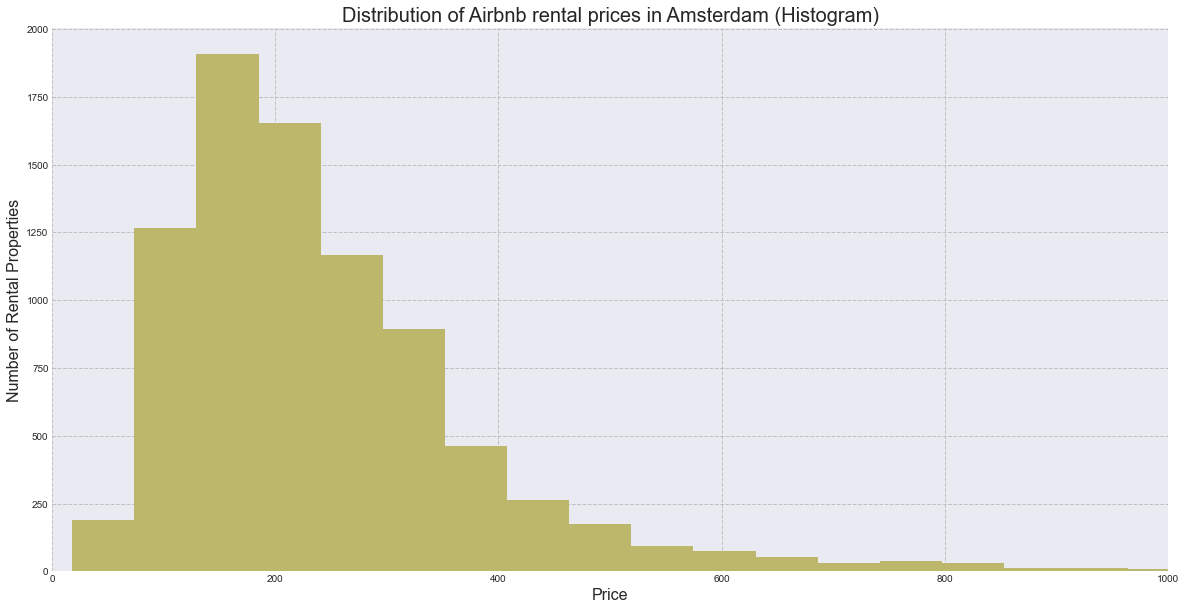

In [136]:
airbnb.hist(column='price', bins=500, grid=True, figsize=(20,10), color = 'darkkhaki')
plt.style.use('seaborn-dark')
plt.title('Distribution of Airbnb rental prices in Amsterdam (Histogram)', fontsize=20)
plt.ylabel('Number of Rental Properties', fontsize=16)
plt.xlabel('Price', fontsize=16)
plt.xlim(0,1000)
plt.grid(color='silver', linestyle='--', linewidth=1)
plt.show()

In [137]:
airbnb.columns


Index(['id', 'name', 'description', 'neighborhood_overview', 'host_id',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm

In [138]:
words_list = list()
words_clean = list()
for line in airbnb.amenities:
    words_list.append(line.split(","))

for words in words_list:
    for word in words:
        word = word.strip()
        word = word.replace("{", "")
        word = word.replace("}", "")
        word = word.replace('"', "")
        word = word.lower()
        word = word.replace(" ","_")
        if word.startswith('translation'):
            continue
        words_clean.append(word)
    
how_to_join = " "
words_clean_str = how_to_join.join(words_clean)


In [139]:
len(words_clean_str)

3932046

In [140]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

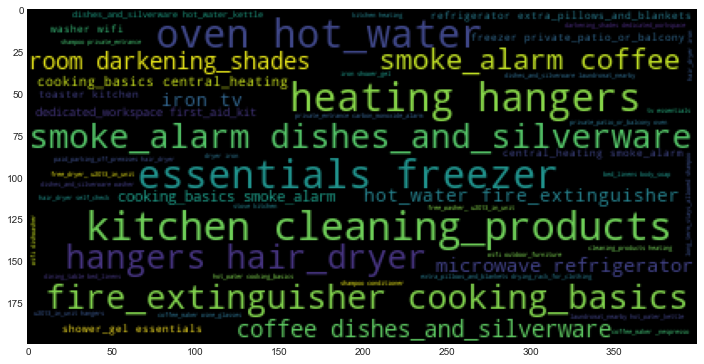

In [141]:
wc = WordCloud().generate(words_clean_str)
plt.figure(figsize=(12,10))
plt.imshow(wc)

In [142]:
airbnb['price_log'] = np.log(airbnb['price']+1) # To handle undefined values we add 1

In [143]:
np_arr = np.asarray(airbnb['price_log'])
np_arr

array([4.12713439, 5.79301361, 4.70048037, ..., 4.91265489, 5.08140436,
       5.35658627])

<Figure size 864x720 with 0 Axes>

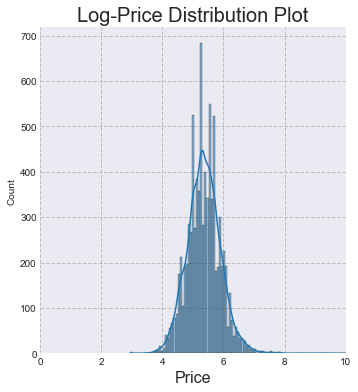

In [144]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(12,10))
sns.displot(np_arr,kde=True)
plt.title("Log-Price Distribution Plot", fontsize=20)
plt.xlabel('Price', fontsize=16)
plt.xlim(0,10)
plt.grid(color='silver', linestyle='--', linewidth=1)
plt.show()

In [145]:
##Linear Regression Model (Price prediction)

In [146]:
price_df = airbnb[["price","price_log","bedrooms","property_type","accommodates",
                   "availability_30","number_of_reviews"
                   ,"room_type", "reviews_per_month","neighbourhood"]]
price_df["property_type"] = price_df["property_type"].factorize()[0]
price_df["room_type"] = price_df["room_type"].factorize()[0]
price_df["neighbourhood"] = price_df["neighbourhood"].factorize()[0]


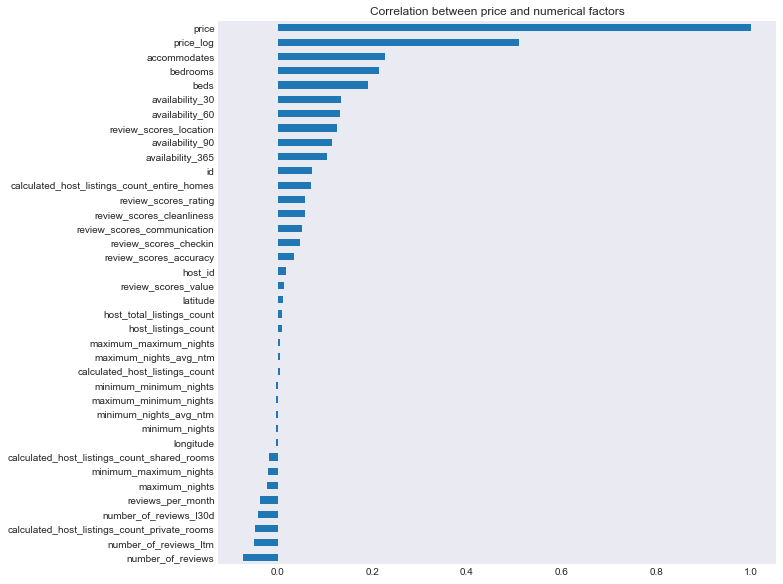

In [147]:
# we can drop the missing data in column 'price' that we are interested in predicting  
col = airbnb.select_dtypes(['float', 'int', 'int64']).columns

airbnb[col].corr() ['price'].sort_values(ascending=True).dropna().plot(kind='barh', figsize=(10,10));
plt.title('Correlation between price and numerical factors');

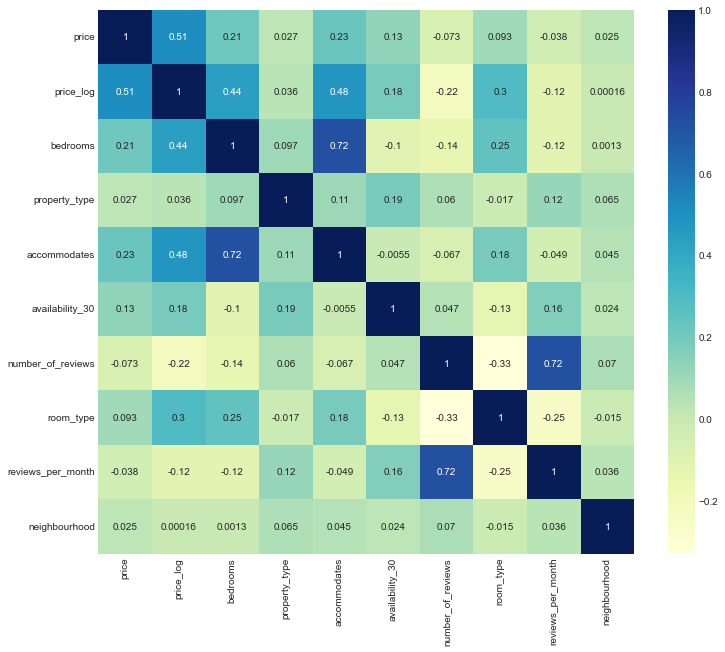

In [148]:
correlation = price_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation,cmap="YlGnBu", annot = True)
plt.show()

In [149]:
# Without feature selection

In [150]:
X = price_df.drop(["price_log"], axis=1)
y = price_df.price_log
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

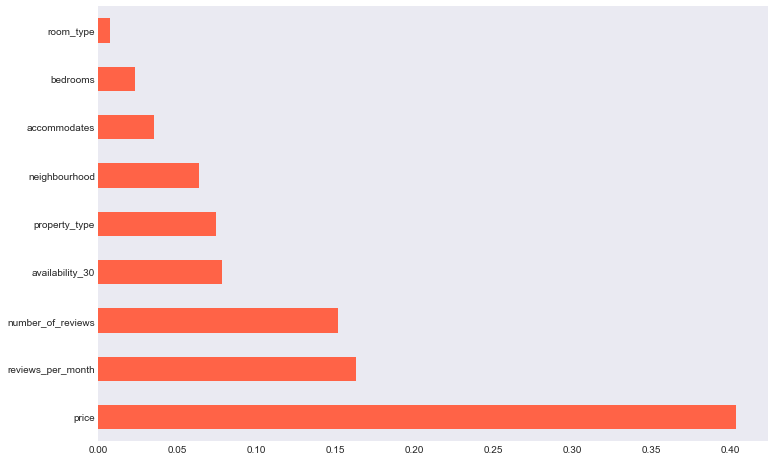

In [151]:
lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(X_train,lab_enc.fit_transform(y_train))

plt.figure(figsize=(12,8))
feat_importances = pd.Series(feature_model.feature_importances_, 
                             index=(price_df.drop(["price_log"], axis=1)).columns)
feat_importances.nlargest(10).plot(kind='barh', color="tomato")
plt.show()

In [152]:
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [153]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.15
R-squared: 0.48


In [154]:
# With Feature Selection

In [155]:
X = price_df.drop(["price_log","room_type"], axis=1)
y = price_df.price_log
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [156]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [157]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, y_pred)))
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.16
RMSE: 0.398621
R-squared: 0.46


Text(0.5, 1.0, 'Linear Regression Model Predictions')

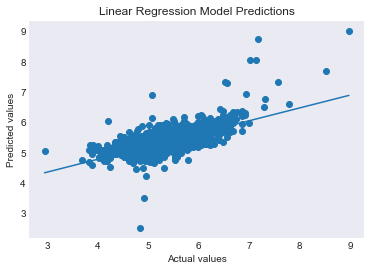

In [158]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)))
plt.title("Linear Regression Model Predictions")

In [159]:
airbnb.columns

Index(['id', 'name', 'description', 'neighborhood_overview', 'host_id',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm

In [160]:
price_df

,price,price_log,bedrooms,property_type,accommodates,availability_30,number_of_reviews,room_type,reviews_per_month,neighbourhood
0,61.0,4.127134,1.0,0,1,1,303,0,2.300000,0
1,327.0,5.793014,1.0,1,2,0,78,1,0.640000,0
2,109.0,4.700480,1.0,2,2,5,341,0,2.730000,0
3,290.0,5.673323,3.0,3,4,0,10,1,0.110000,0
4,150.0,5.017280,1.0,4,2,2,699,0,6.620000,1
...,...,...,...,...,...,...,...,...,...,...
8381,250.0,5.525453,1.0,1,2,0,0,1,1.175696,-1
8382,337.0,5.823046,3.0,14,8,29,0,1,1.175696,-1
8383,135.0,4.912655,1.0,1,2,7,0,1,1.175696,1
8384,160.0,5.081404,1.0,32,2,6,0,0,1.175696,-1


In [161]:
len(airbnb.columns)

66

In [99]:
#RF 

In [100]:
from sklearn.model_selection import cross_val_score, train_test_split
def model_eval(X_train, y_train, X_test, y_test, model):
    '''
    input: X is features data frame, y is response, model
    output: train cross validation score, test score, predicted values
    
    '''
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)
    model.fit(X_train, np.ravel(y_train))
    y_pred = model.predict(X_test)
    score = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = 5) 
    test_score = r2_score(y_test, y_pred)                      
    return score, test_score, y_pred

['bedrooms', 'property_type', 'accommodates', 'availability_30', 'number_of_reviews', 'room_type', 'reviews_per_month', 'neighbourhood']


Scenario RF with narrow set of selected features:
- r2_score: 0.3825575187030401
- mse :  0.18865576149223165
- RMSE: 0.434345


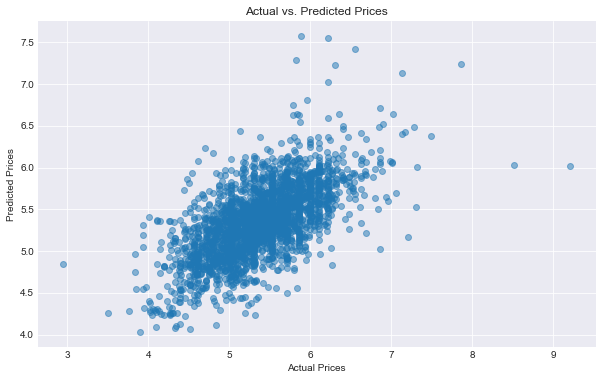

In [101]:
from sklearn.ensemble import RandomForestRegressor
df_train, df_test = train_test_split(price_df, test_size=0.30, random_state=41) 
not_in_consideration = ["price","price_log"] 
price_df = [i for i in price_df if i not in not_in_consideration]
print(price_df)
X_num = df_train[price_df]
Y = df_train["price_log"]
Y_test = df_test["price_log"]
X_test = df_test[price_df]


model = RandomForestRegressor(n_estimators=100,                
                               criterion='squared_error', 
                               random_state=3, 
                               n_jobs=-1)
score, test_score, y_pred = model_eval(X_num, Y, X_test, Y_test, model)
mse = mean_squared_error(Y_test, y_pred)
print('\n')
print('Scenario RF with narrow set of selected features:')
print('- r2_score:', test_score)
print('- mse : ', mse)
print('- RMSE: %f'% np.sqrt(mean_squared_error(Y_test, y_pred)))
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Random Forest Regression Model Predictions')

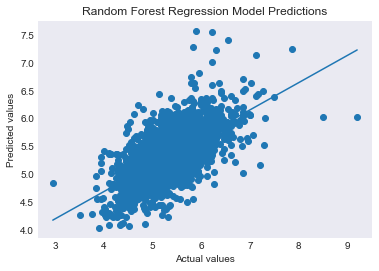

In [102]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot(np.unique(Y_test), np.poly1d(np.polyfit(Y_test, y_pred, 1))(np.unique(Y_test)))
plt.title("Random Forest Regression Model Predictions")

In [162]:
#XGBoost

In [163]:
import xgboost
df_train, df_test = train_test_split(price_df, test_size=0.30, random_state=41) 
not_in_consideration = ["price","price_log"] 
price_df = [i for i in price_df if i not in not_in_consideration]
print(price_df)
X = df_train[price_df]
Y = df_train["price_log"]
Y_test = df_test["price_log"]
X_test = df_test[price_df]
model_xgb = xgboost.XGBRegressor(n_estimators=100,
                                 learning_rate=0.08, gamma=0, 
                                 subsample=0.75, 
                                 colsample_bytree=1, max_depth=7)

score, test_score, y_pred_xgb = model_eval(X, Y, X_test, Y_test, model_xgb)
#xgb.fit(X_train,y_train)
mse = mean_squared_error(Y_test, y_pred_xgb)
print('Number of columns is:', df_test.shape[1])
print(df_test.columns)
print('\n')
print('Scenario XGB with numerical and One Hot Encoded categorical features together:')
print('- Mean of crossvalidation scores:', np.mean(score))
print('- r2_score:', test_score)
print('- mse : ', mse)
print('- RMSE: %f'% np.sqrt(mean_squared_error(Y_test, y_pred_xgb)))

['bedrooms', 'property_type', 'accommodates', 'availability_30', 'number_of_reviews', 'room_type', 'reviews_per_month', 'neighbourhood']
Number of columns is: 10
Index(['price', 'price_log', 'bedrooms', 'property_type', 'accommodates',
       'availability_30', 'number_of_reviews', 'room_type',
       'reviews_per_month', 'neighbourhood'],
      dtype='object')


Scenario XGB with numerical and One Hot Encoded categorical features together:
- Mean of crossvalidation scores: 0.44597497168492917
- r2_score: 0.4525545612388493
- mse :  0.16726859465191493
- RMSE: 0.408985


Text(0.5, 1.0, 'XGBoost Model Predictions')

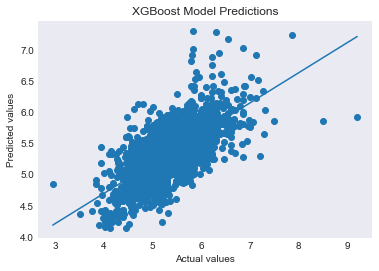

In [164]:
plt.scatter(Y_test, y_pred_xgb)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot(np.unique(Y_test), np.poly1d(np.polyfit(Y_test, y_pred_xgb, 1))(np.unique(Y_test)))
plt.title("XGBoost Model Predictions")